
# 1  Concept

## 1.1 What is GAN?

Generative Adversarial Networks (GANs) are a class of deep neural network architectures introduced by Goodfellow et al. in 2014 [Goodfellow, I., et al. (2014). Generative adversarial nets. arXiv:1406.2661, https://doi.org/10.48550/arXiv.1406.2661]. At its core, GANs consist of two competing neural networks: a Generator (G) and a Discriminator (D).

- Generator (G): Aims to produce data that seems to come from the true data distribution. Given a random noise $Z$, sampled from a standard distribution $Z'$, it creates a sample $G(Z)$ that approximates a distribution $D'$ close to the true data distribution $D$.

- Discriminator (D): Acts as a classifier, trying to distinguish between genuine data and the data produced by the generator.

The objective of GANs is to train the generator such that the discriminator can no longer distinguish between real and generated samples, ensuring that $D'$ is as close as possible to $D$.

## 1.2 Loss function of GAN

- Discriminator Loss: The discriminator aims to correctly classify real data as real and generated data as fake. The loss for the discriminator is formulated as:
$$
L_{D}=-(E_{x \sim p_{data}(x)}[logD(x)]+E_{z \sim p_{z}(z)}[log(1-D(G(z)))])
$$
Where:
  - $D(x)$ is the discriminator's output for real data sample $x$.
  - $G(z)$ is the generator's output for noise $z$.

- Generator Loss: The generator aims to deceive the discriminator into believing that the generated data is real. Its loss is given by:
$$
L_{G}=-E_{z \sim p_{z}(z)}[logD(G(z))])
$$

Here, the generator tries to maximize the mistake made by the discriminator.

These loss functions form the basis of the original GAN, and both the generator and discriminator are trained alternately using these losses.


## 1.3 Applications:
GANs have been applied in various tasks, including:

- Image Generation: E.g., creating artworks, animated characters, or other visual images.
- Image Enhancement: E.g., upscaling resolution, denoising, or color correction.
- Style Transfer: Applying a style to an image, like transforming a landscape image to Van Gogh's painting style.
- Data Augmentation: Generating new samples for datasets to improve machine learning model performance.
- Simulated Data Generation: Generating data for domains where direct acquisition might be challenging, like medical imagery.
- Video Generation and Editing: Creating or modifying video clips.

## 1.4 Advancements:
Post its inception in 2014, GANs have witnessed remarkable progress:

- Stabilized Training Techniques: Methods like Wasserstein GAN and Spectral Normalization have been introduced to ensure more stable GAN training.
- High-Resolution Image Synthesis: Innovations such as BigGAN, StyleGAN, and StyleGAN2 have enabled the generation of high-quality, high-resolution images.
- Specific Domain Applications: Tools like CycleGAN facilitate unsupervised image-to-image translations.
- Integration with Other Technologies: GANs have been combined with reinforcement learning, transfer learning, and more, to broaden their applications.

## 1.5 Challenges with GANs:
While GANs are powerful, they are not without issues:

- Vanishing Gradients: Early in the training, if the discriminator performs too well, the generator may stop learning, leading to vanishing gradients.
- Mode Collapse: The generator may produce limited varieties of samples, causing a lack of diversity in generated data.
- Achieving Nash Equilibrium: The two-player game between the generator and discriminator makes it challenging to reach a point where neither player has an incentive to change its strategy.

## 1.6 Training Challenges and Techniques:
Training GANs is considered challenging because both networks (Generator and Discriminator) need to maintain a balance during training. If one network vastly outperforms the other, it can lead to stagnation in the training process. To address this, researchers have proposed several training techniques, such as:

- Gradient Clipping: To prevent gradients in the discriminator from exploding or vanishing, its gradient magnitude can be limited.
- Alternative Loss Functions: Beyond the original GAN loss, there are other loss functions like LSGAN, Wasserstein loss, etc., which might lead to more stable training.
- Conditional GANs: Incorporate additional information, like labels or data, during training to produce specific types of outputs.

## 1.7 Variants of GANs:
Starting from the original GAN model, there have been numerous variants and extensions:

- DCGAN (Deep Convolutional GAN): Utilizes convolutional layers to improve the quality of generated images.
- Conditional GANs: Allows data generation based on given conditions or labels.
- InfoGAN: Encodes additional information into the generated data, enabling the model to learn more meaningful features.
- ACGAN (Auxiliary Classifier GAN): In addition to the generator and discriminator, there's an extra classifier that aids the model in generating data with specific characteristics.

## 1.8 Evaluating GANs:
Evaluating the performance of generative models is challenging since the data they produce is unseen. However, there are a few commonly used methods to evaluate GANs:

- Inception Score: Uses a pre-trained Inception model to evaluate the quality and diversity of generated images.
- FID (Fréchet Inception Distance): Measures the distance between real and generated data distributions.
- Precision, Recall, and F1-score: Assess the diversity and quality of generated data.

## 1.9 Future Trends and Potential Applications:
While GANs have achieved significant success in areas like image generation, style transfer, and data augmentation, there's vast potential in other domains, including:

- Voice and Audio Generation: Utilizing GANs to generate or modify audio signals.
- Drug Discovery: Using GANs to predict potential drug molecular structures.
- Financial Modeling: Employing GANs to simulate behaviors of financial markets or generate financial data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2 Implementation of Generative Adversarial Networks (GAN) using PyTorch on the MNIST Dataset

Below code outlines the process of implementing, training, and evaluating a simple Generative Adversarial Network (GAN) on the MNIST dataset, which consists of handwritten digits.

2.1 **Import Necessary Libraries**:

Essential Python libraries and modules are imported to support neural network operations, dataset handling, and mathematical computations.

2.2 **Set Hyperparameters**:

Defines important parameters like learning rate, batch size, and the number of training epochs.

2.3 Prepare the MNIST Dataset:

The MNIST dataset is loaded, with images normalized to have values between -1 and 1.

2.4 **Define the Generator Network**:

Describes the generator's architecture, which takes random noise as input and produces an image.

2.5 **Define the Discriminator Network**:

Describes the discriminator's architecture, which classifies whether a given image is real (from the dataset) or fake (generated by the generator).

2.6 **Initialize Models and Optimizers**:

Initializes the generator and discriminator models, defines the loss function, and sets up the optimizers.

2.7 **Training Loop with Visualization**:

Executes the training process where the generator and discriminator are trained in alternation. Every few epochs, a sample generated image is displayed to visually inspect the training progress.

2.8 **Evaluation using Frechet Inception Distance (FID)**:

Evaluates the quality of the generated images compared to real images using the FID metric, which provides a numerical measure of the distance between the distributions of real and generated images.

2.9 **Visual Inspection of Generated Images**:

Displays a grid of generated images to visually inspect the generator's outputs after training.

**Type of GAN:**
The implemented GAN is a basic, vanilla GAN. It uses feed-forward neural networks for both the generator and discriminator and is trained using the binary cross-entropy loss. The primary goal of this GAN is to generate handwritten digit images that resemble those in the MNIST dataset.





In [ ]:
# Step 1: Import Necessary Libraries
import torch
import torch.nn as nn
import torchvision

import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import sqrtm



In [ ]:
# Step 2: Set Hyperparameters
batch_size = 100
learning_rate = 0.0002
num_epochs = 100

# GPU device setup
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [ ]:
# Step 3: Prepare the MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
mnist = dsets.MNIST(root='./data', train=True, transform=transform, download=True)
data_loader = torch.utils.data.DataLoader(dataset=mnist, batch_size=batch_size, shuffle=True)


100%|██████████| 9912422/9912422 [00:00<00:00, 144111416.22it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 48357562.40it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 77927292.97it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5315437.71it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Step 4: Define the Generator Network
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(100, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 784),
            nn.Tanh()
        )
    def forward(self, x):
        return self.main(x)


In [ ]:
# Step 5: Define the Discriminator Network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(784, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.main(x)


In [ ]:
# Step 6: Initialize Models and Optimizers
generator = Generator().to(device)
discriminator = Discriminator().to(device)
criterion = nn.BCELoss()
optimizer_g = torch.optim.Adam(generator.parameters(), lr=learning_rate)
optimizer_d = torch.optim.Adam(discriminator.parameters(), lr=learning_rate)


Epoch [1/100], Step [100/600], d_loss: 0.6570, g_loss: 1.7307, D(x): 0.92, D(G(z)): 0.43
Epoch [1/100], Step [200/600], d_loss: 0.0770, g_loss: 4.0353, D(x): 0.98, D(G(z)): 0.05
Epoch [1/100], Step [300/600], d_loss: 0.3891, g_loss: 4.3996, D(x): 0.84, D(G(z)): 0.13
Epoch [1/100], Step [400/600], d_loss: 0.1576, g_loss: 4.4753, D(x): 0.94, D(G(z)): 0.08
Epoch [1/100], Step [500/600], d_loss: 0.2553, g_loss: 3.1324, D(x): 0.90, D(G(z)): 0.10
Epoch [1/100], Step [600/600], d_loss: 0.2540, g_loss: 4.4006, D(x): 0.91, D(G(z)): 0.11
Epoch [2/100], Step [100/600], d_loss: 1.8077, g_loss: 1.1953, D(x): 0.51, D(G(z)): 0.45
Epoch [2/100], Step [200/600], d_loss: 1.6664, g_loss: 1.1558, D(x): 0.55, D(G(z)): 0.50
Epoch [2/100], Step [300/600], d_loss: 1.3953, g_loss: 0.9435, D(x): 0.64, D(G(z)): 0.49
Epoch [2/100], Step [400/600], d_loss: 2.1887, g_loss: 0.5889, D(x): 0.41, D(G(z)): 0.63
Epoch [2/100], Step [500/600], d_loss: 0.9002, g_loss: 1.2659, D(x): 0.65, D(G(z)): 0.33
Epoch [2/100], Step [

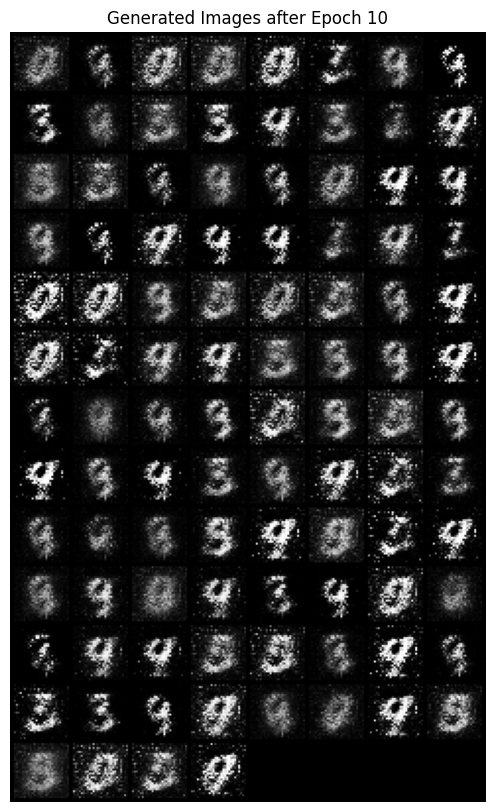

Epoch [11/100], Step [100/600], d_loss: 0.7203, g_loss: 3.3532, D(x): 0.91, D(G(z)): 0.35
Epoch [11/100], Step [200/600], d_loss: 0.6680, g_loss: 3.7750, D(x): 0.78, D(G(z)): 0.13
Epoch [11/100], Step [300/600], d_loss: 0.6805, g_loss: 3.9742, D(x): 0.80, D(G(z)): 0.20
Epoch [11/100], Step [400/600], d_loss: 0.6158, g_loss: 3.7945, D(x): 0.87, D(G(z)): 0.22
Epoch [11/100], Step [500/600], d_loss: 0.7612, g_loss: 2.8882, D(x): 0.72, D(G(z)): 0.19
Epoch [11/100], Step [600/600], d_loss: 0.3609, g_loss: 2.9642, D(x): 0.88, D(G(z)): 0.12
Epoch [12/100], Step [100/600], d_loss: 0.4925, g_loss: 2.3431, D(x): 0.90, D(G(z)): 0.26
Epoch [12/100], Step [200/600], d_loss: 0.6294, g_loss: 2.3337, D(x): 0.82, D(G(z)): 0.24
Epoch [12/100], Step [300/600], d_loss: 0.4500, g_loss: 3.1249, D(x): 0.84, D(G(z)): 0.14
Epoch [12/100], Step [400/600], d_loss: 0.7197, g_loss: 2.4177, D(x): 0.81, D(G(z)): 0.23
Epoch [12/100], Step [500/600], d_loss: 0.4942, g_loss: 3.7296, D(x): 0.85, D(G(z)): 0.15
Epoch [12/

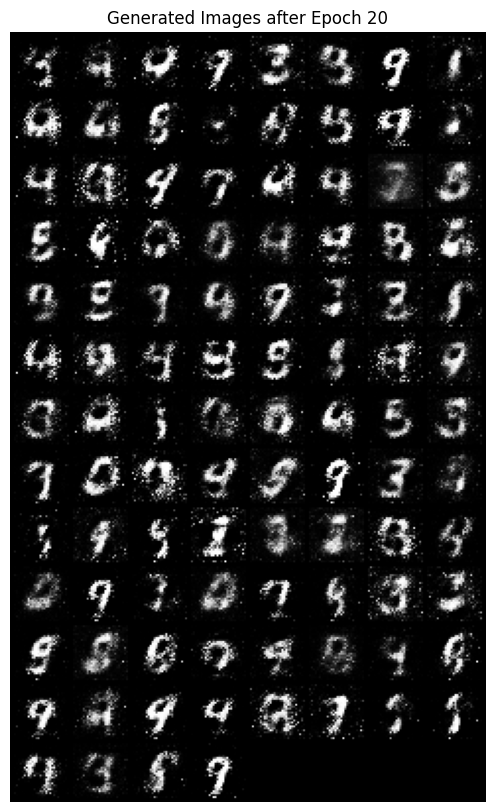

Epoch [21/100], Step [100/600], d_loss: 0.7639, g_loss: 2.1000, D(x): 0.85, D(G(z)): 0.32
Epoch [21/100], Step [200/600], d_loss: 0.8675, g_loss: 2.1219, D(x): 0.82, D(G(z)): 0.35
Epoch [21/100], Step [300/600], d_loss: 0.6733, g_loss: 2.8952, D(x): 0.81, D(G(z)): 0.22
Epoch [21/100], Step [400/600], d_loss: 0.8808, g_loss: 1.9129, D(x): 0.70, D(G(z)): 0.21
Epoch [21/100], Step [500/600], d_loss: 0.7853, g_loss: 2.0383, D(x): 0.76, D(G(z)): 0.22
Epoch [21/100], Step [600/600], d_loss: 0.8348, g_loss: 2.6202, D(x): 0.72, D(G(z)): 0.21
Epoch [22/100], Step [100/600], d_loss: 0.5487, g_loss: 2.7553, D(x): 0.80, D(G(z)): 0.16
Epoch [22/100], Step [200/600], d_loss: 0.5906, g_loss: 2.4835, D(x): 0.79, D(G(z)): 0.18
Epoch [22/100], Step [300/600], d_loss: 0.5734, g_loss: 2.3319, D(x): 0.86, D(G(z)): 0.24
Epoch [22/100], Step [400/600], d_loss: 1.0066, g_loss: 1.7056, D(x): 0.81, D(G(z)): 0.37
Epoch [22/100], Step [500/600], d_loss: 0.8803, g_loss: 2.4057, D(x): 0.76, D(G(z)): 0.32
Epoch [22/

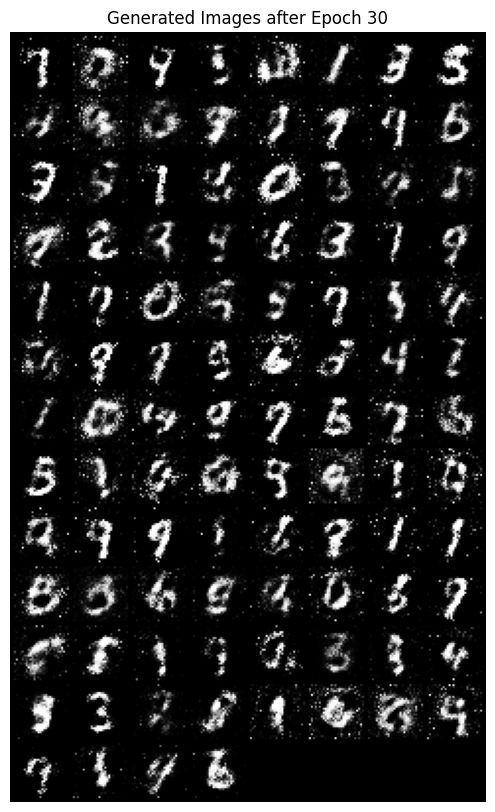

Epoch [31/100], Step [100/600], d_loss: 0.8342, g_loss: 2.0059, D(x): 0.80, D(G(z)): 0.30
Epoch [31/100], Step [200/600], d_loss: 0.7835, g_loss: 2.4088, D(x): 0.79, D(G(z)): 0.30
Epoch [31/100], Step [300/600], d_loss: 0.7381, g_loss: 1.7546, D(x): 0.76, D(G(z)): 0.25
Epoch [31/100], Step [400/600], d_loss: 0.6531, g_loss: 2.2440, D(x): 0.79, D(G(z)): 0.21
Epoch [31/100], Step [500/600], d_loss: 0.5369, g_loss: 2.1583, D(x): 0.79, D(G(z)): 0.17
Epoch [31/100], Step [600/600], d_loss: 0.7627, g_loss: 1.9024, D(x): 0.77, D(G(z)): 0.28
Epoch [32/100], Step [100/600], d_loss: 0.8488, g_loss: 2.6050, D(x): 0.86, D(G(z)): 0.38
Epoch [32/100], Step [200/600], d_loss: 0.8442, g_loss: 1.6318, D(x): 0.72, D(G(z)): 0.22
Epoch [32/100], Step [300/600], d_loss: 0.6664, g_loss: 1.9125, D(x): 0.75, D(G(z)): 0.17
Epoch [32/100], Step [400/600], d_loss: 0.8511, g_loss: 1.8159, D(x): 0.74, D(G(z)): 0.32
Epoch [32/100], Step [500/600], d_loss: 0.5327, g_loss: 2.1523, D(x): 0.84, D(G(z)): 0.23
Epoch [32/

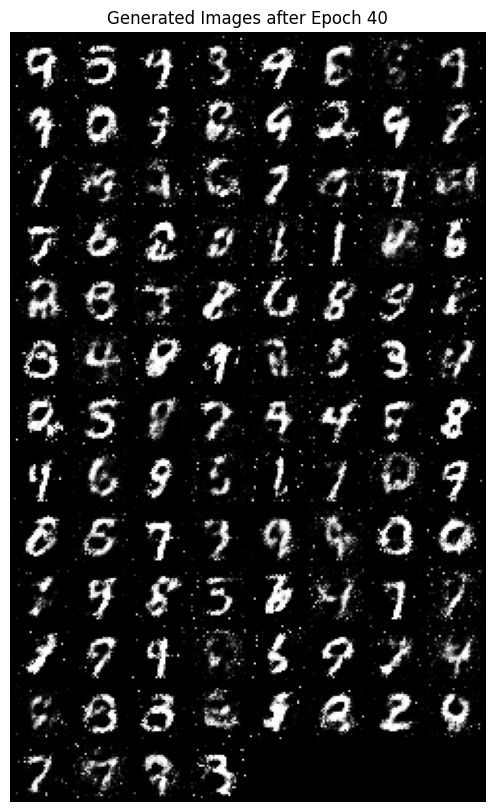

Epoch [41/100], Step [100/600], d_loss: 0.6944, g_loss: 2.1031, D(x): 0.80, D(G(z)): 0.27
Epoch [41/100], Step [200/600], d_loss: 0.7832, g_loss: 2.1827, D(x): 0.72, D(G(z)): 0.21
Epoch [41/100], Step [300/600], d_loss: 0.7936, g_loss: 1.5086, D(x): 0.71, D(G(z)): 0.25
Epoch [41/100], Step [400/600], d_loss: 0.7491, g_loss: 2.1334, D(x): 0.78, D(G(z)): 0.28
Epoch [41/100], Step [500/600], d_loss: 0.6124, g_loss: 2.1054, D(x): 0.79, D(G(z)): 0.22
Epoch [41/100], Step [600/600], d_loss: 0.8782, g_loss: 1.5482, D(x): 0.65, D(G(z)): 0.22
Epoch [42/100], Step [100/600], d_loss: 0.8692, g_loss: 1.4570, D(x): 0.70, D(G(z)): 0.27
Epoch [42/100], Step [200/600], d_loss: 0.7262, g_loss: 1.8896, D(x): 0.80, D(G(z)): 0.29
Epoch [42/100], Step [300/600], d_loss: 0.8371, g_loss: 1.2054, D(x): 0.71, D(G(z)): 0.27
Epoch [42/100], Step [400/600], d_loss: 0.8457, g_loss: 1.8461, D(x): 0.73, D(G(z)): 0.26
Epoch [42/100], Step [500/600], d_loss: 0.8127, g_loss: 1.9542, D(x): 0.73, D(G(z)): 0.27
Epoch [42/

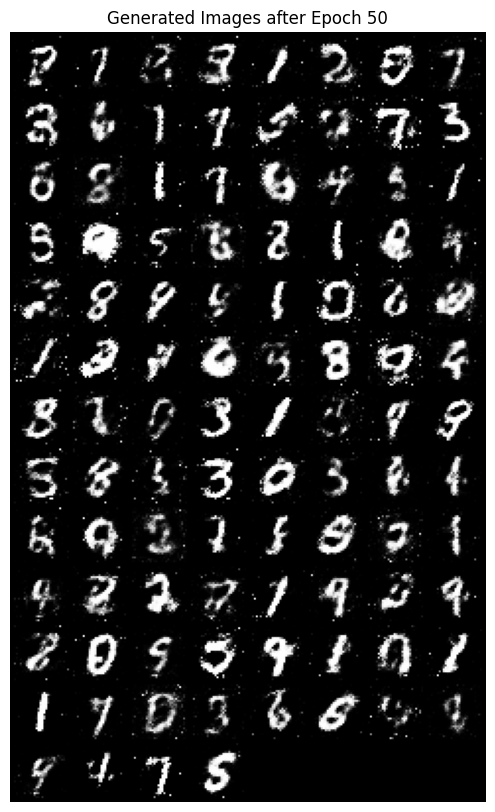

Epoch [51/100], Step [100/600], d_loss: 0.6916, g_loss: 2.0941, D(x): 0.69, D(G(z)): 0.16
Epoch [51/100], Step [200/600], d_loss: 0.9463, g_loss: 2.3995, D(x): 0.63, D(G(z)): 0.19
Epoch [51/100], Step [300/600], d_loss: 0.7541, g_loss: 1.4702, D(x): 0.73, D(G(z)): 0.25
Epoch [51/100], Step [400/600], d_loss: 0.8552, g_loss: 1.8489, D(x): 0.80, D(G(z)): 0.35
Epoch [51/100], Step [500/600], d_loss: 0.6709, g_loss: 2.2290, D(x): 0.75, D(G(z)): 0.23
Epoch [51/100], Step [600/600], d_loss: 0.7477, g_loss: 1.9992, D(x): 0.70, D(G(z)): 0.19
Epoch [52/100], Step [100/600], d_loss: 0.7371, g_loss: 1.5945, D(x): 0.81, D(G(z)): 0.31
Epoch [52/100], Step [200/600], d_loss: 0.9769, g_loss: 2.3967, D(x): 0.64, D(G(z)): 0.23
Epoch [52/100], Step [300/600], d_loss: 0.7868, g_loss: 2.1745, D(x): 0.66, D(G(z)): 0.18
Epoch [52/100], Step [400/600], d_loss: 1.0296, g_loss: 1.6853, D(x): 0.78, D(G(z)): 0.42
Epoch [52/100], Step [500/600], d_loss: 0.8341, g_loss: 2.1632, D(x): 0.74, D(G(z)): 0.26
Epoch [52/

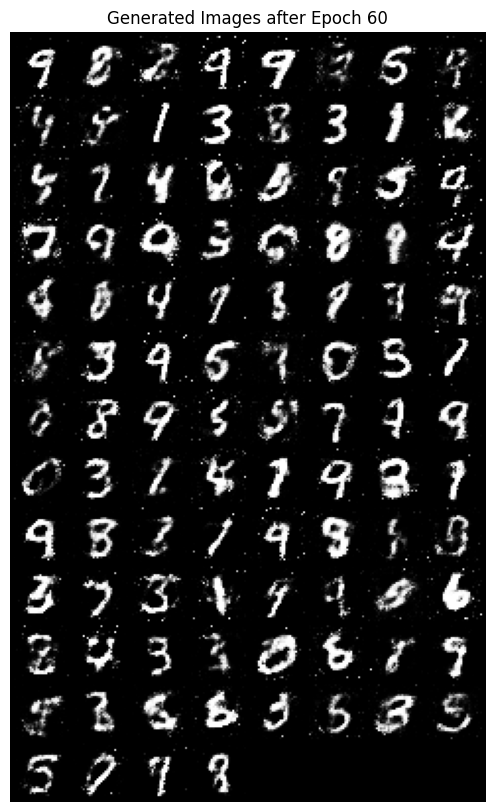

Epoch [61/100], Step [100/600], d_loss: 0.8314, g_loss: 1.6724, D(x): 0.72, D(G(z)): 0.25
Epoch [61/100], Step [200/600], d_loss: 0.9587, g_loss: 1.5114, D(x): 0.69, D(G(z)): 0.28
Epoch [61/100], Step [300/600], d_loss: 0.6868, g_loss: 2.2894, D(x): 0.74, D(G(z)): 0.19
Epoch [61/100], Step [400/600], d_loss: 0.8348, g_loss: 1.7657, D(x): 0.67, D(G(z)): 0.23
Epoch [61/100], Step [500/600], d_loss: 0.7561, g_loss: 1.9301, D(x): 0.75, D(G(z)): 0.26
Epoch [61/100], Step [600/600], d_loss: 0.7827, g_loss: 1.5935, D(x): 0.69, D(G(z)): 0.21
Epoch [62/100], Step [100/600], d_loss: 0.6906, g_loss: 2.0969, D(x): 0.72, D(G(z)): 0.20
Epoch [62/100], Step [200/600], d_loss: 0.8829, g_loss: 2.2922, D(x): 0.69, D(G(z)): 0.25
Epoch [62/100], Step [300/600], d_loss: 0.7819, g_loss: 1.8889, D(x): 0.76, D(G(z)): 0.30
Epoch [62/100], Step [400/600], d_loss: 0.7553, g_loss: 2.0642, D(x): 0.75, D(G(z)): 0.25
Epoch [62/100], Step [500/600], d_loss: 0.8825, g_loss: 1.6899, D(x): 0.78, D(G(z)): 0.34
Epoch [62/

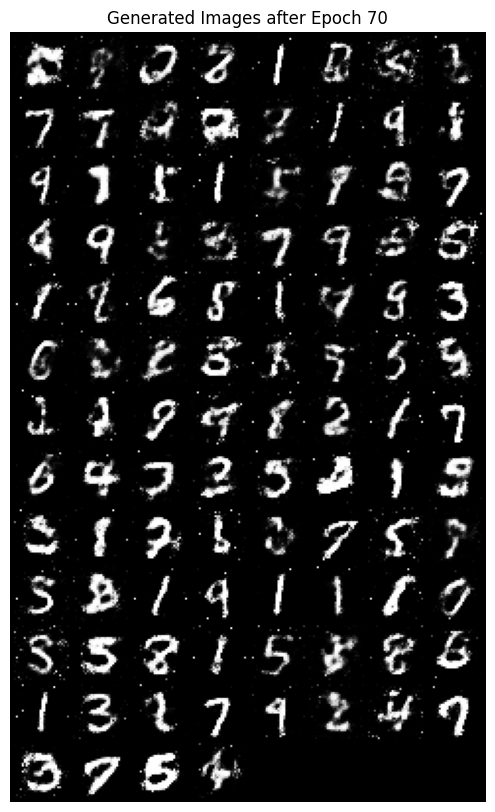

Epoch [71/100], Step [100/600], d_loss: 0.8314, g_loss: 1.8419, D(x): 0.72, D(G(z)): 0.29
Epoch [71/100], Step [200/600], d_loss: 0.6764, g_loss: 1.7664, D(x): 0.82, D(G(z)): 0.29
Epoch [71/100], Step [300/600], d_loss: 0.6628, g_loss: 2.1966, D(x): 0.81, D(G(z)): 0.27
Epoch [71/100], Step [400/600], d_loss: 0.8605, g_loss: 2.0768, D(x): 0.67, D(G(z)): 0.22
Epoch [71/100], Step [500/600], d_loss: 0.9280, g_loss: 1.6089, D(x): 0.73, D(G(z)): 0.29
Epoch [71/100], Step [600/600], d_loss: 0.7398, g_loss: 1.8535, D(x): 0.80, D(G(z)): 0.31
Epoch [72/100], Step [100/600], d_loss: 0.9422, g_loss: 1.9842, D(x): 0.65, D(G(z)): 0.22
Epoch [72/100], Step [200/600], d_loss: 0.6766, g_loss: 2.1697, D(x): 0.73, D(G(z)): 0.20
Epoch [72/100], Step [300/600], d_loss: 0.7136, g_loss: 2.2632, D(x): 0.74, D(G(z)): 0.22
Epoch [72/100], Step [400/600], d_loss: 0.9356, g_loss: 1.8842, D(x): 0.63, D(G(z)): 0.20
Epoch [72/100], Step [500/600], d_loss: 0.8130, g_loss: 2.1362, D(x): 0.78, D(G(z)): 0.30
Epoch [72/

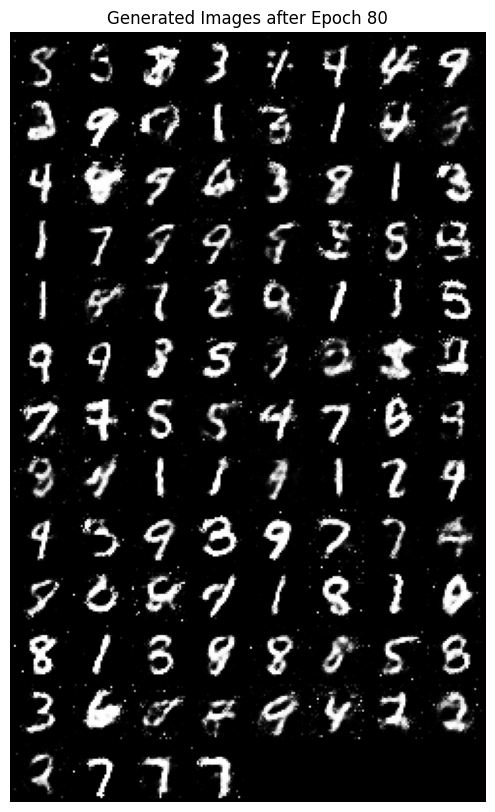

Epoch [81/100], Step [100/600], d_loss: 0.9013, g_loss: 1.9893, D(x): 0.74, D(G(z)): 0.32
Epoch [81/100], Step [200/600], d_loss: 0.8192, g_loss: 1.2967, D(x): 0.70, D(G(z)): 0.26
Epoch [81/100], Step [300/600], d_loss: 0.7454, g_loss: 1.5558, D(x): 0.72, D(G(z)): 0.23
Epoch [81/100], Step [400/600], d_loss: 0.8334, g_loss: 2.1626, D(x): 0.72, D(G(z)): 0.27
Epoch [81/100], Step [500/600], d_loss: 0.8287, g_loss: 1.6889, D(x): 0.71, D(G(z)): 0.26
Epoch [81/100], Step [600/600], d_loss: 0.7838, g_loss: 1.8030, D(x): 0.76, D(G(z)): 0.30
Epoch [82/100], Step [100/600], d_loss: 0.8737, g_loss: 1.3963, D(x): 0.73, D(G(z)): 0.29
Epoch [82/100], Step [200/600], d_loss: 1.0565, g_loss: 1.5529, D(x): 0.67, D(G(z)): 0.34
Epoch [82/100], Step [300/600], d_loss: 0.9383, g_loss: 2.1142, D(x): 0.66, D(G(z)): 0.24
Epoch [82/100], Step [400/600], d_loss: 0.9619, g_loss: 1.7261, D(x): 0.65, D(G(z)): 0.22
Epoch [82/100], Step [500/600], d_loss: 0.7363, g_loss: 1.8326, D(x): 0.75, D(G(z)): 0.26
Epoch [82/

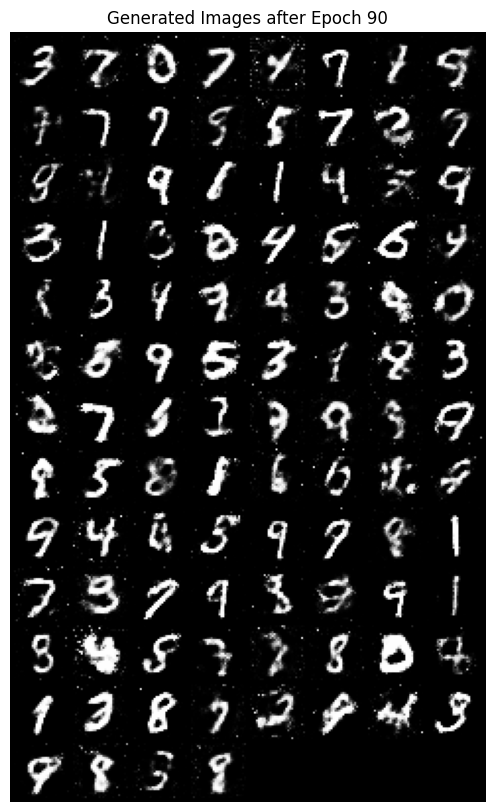

Epoch [91/100], Step [100/600], d_loss: 0.7808, g_loss: 1.9859, D(x): 0.74, D(G(z)): 0.26
Epoch [91/100], Step [200/600], d_loss: 0.6898, g_loss: 2.3118, D(x): 0.79, D(G(z)): 0.26
Epoch [91/100], Step [300/600], d_loss: 0.8838, g_loss: 1.7542, D(x): 0.78, D(G(z)): 0.33
Epoch [91/100], Step [400/600], d_loss: 0.9269, g_loss: 1.6087, D(x): 0.70, D(G(z)): 0.28
Epoch [91/100], Step [500/600], d_loss: 0.7680, g_loss: 1.8779, D(x): 0.80, D(G(z)): 0.31
Epoch [91/100], Step [600/600], d_loss: 0.7573, g_loss: 1.9677, D(x): 0.68, D(G(z)): 0.15
Epoch [92/100], Step [100/600], d_loss: 0.7987, g_loss: 1.6553, D(x): 0.69, D(G(z)): 0.25
Epoch [92/100], Step [200/600], d_loss: 0.8689, g_loss: 1.5750, D(x): 0.71, D(G(z)): 0.28
Epoch [92/100], Step [300/600], d_loss: 0.9286, g_loss: 1.9980, D(x): 0.78, D(G(z)): 0.35
Epoch [92/100], Step [400/600], d_loss: 0.7201, g_loss: 1.7897, D(x): 0.76, D(G(z)): 0.22
Epoch [92/100], Step [500/600], d_loss: 0.7986, g_loss: 1.5416, D(x): 0.77, D(G(z)): 0.33
Epoch [92/

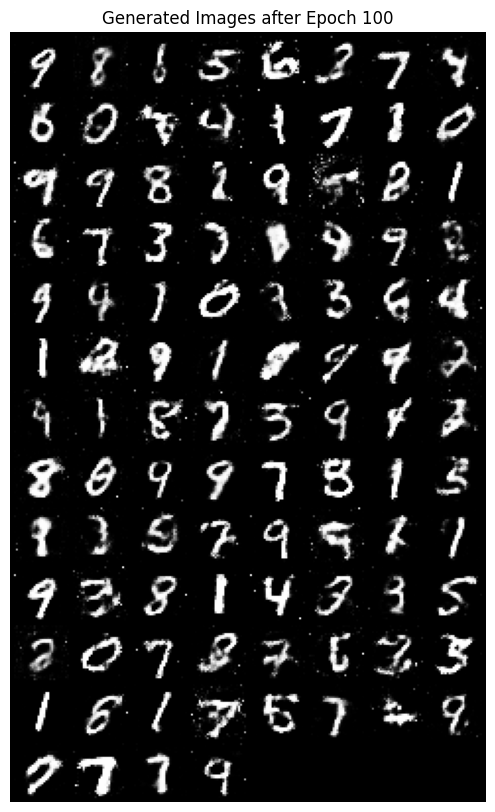

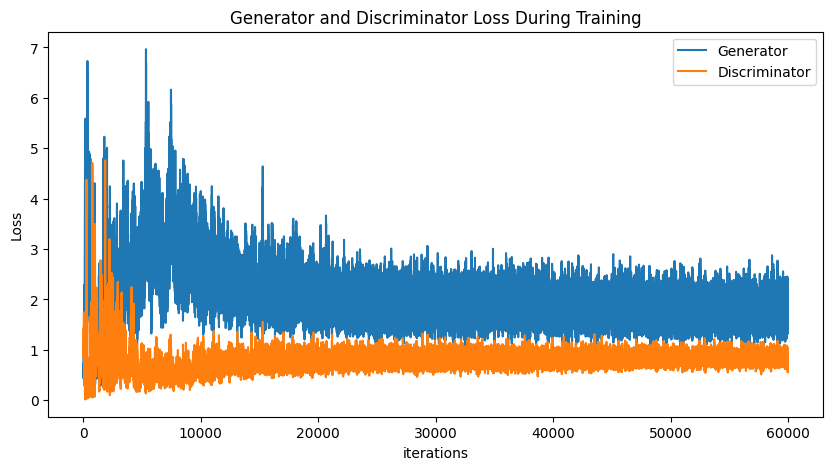

In [ ]:
# Step 7: Training Loop with Visualization
import torchvision.utils as vutils  # Importing utility for visualizing images in a grid

G_losses = []  # List to store generator losses
D_losses = []  # List to store discriminator losses
display_interval = 10  # Display generated images every 10 epochs

for epoch in range(num_epochs):
    for i, (images, _) in enumerate(data_loader):
        images = images.reshape(batch_size, -1).to(device)  # Flatten the images
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # Train Discriminator
        optimizer_d.zero_grad()
        outputs = discriminator(images)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs

        z = torch.randn(batch_size, 100).to(device)
        fake_images = generator(z)
        outputs = discriminator(fake_images.detach())
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs

        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_d.step()

        # Train Generator
        optimizer_g.zero_grad()
        outputs = discriminator(fake_images)
        g_loss = criterion(outputs, real_labels)
        g_loss.backward()
        optimizer_g.step()

        # Save the losses for plotting
        D_losses.append(d_loss.item())
        G_losses.append(g_loss.item())

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(data_loader)}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}, D(x): {real_score.mean().item():.2f}, D(G(z)): {fake_score.mean().item():.2f}')

    if (epoch + 1) % display_interval == 0 or epoch == num_epochs - 1:
        fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)

        # Display the generated images in a grid
        plt.figure(figsize=(10,10))
        plt.axis("off")
        plt.title(f'Generated Images after Epoch {epoch+1}')
        plt.imshow(np.transpose(vutils.make_grid(fake_images, padding=2, normalize=True).cpu(),(1,2,0)))
        plt.show()


# Plot the losses of the Generator and the Discriminator during the training of GAN
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses, label="Generator")
plt.plot(D_losses, label="Discriminator")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
# Step 8: Evaluation using Frechet Inception Distance (FID)
'''
In step 8, I will evaluate the quality of the generated images using a metric called Frechet Inception Distance (FID). The process involves:

- Loading the pre-trained Inception v3 model.
- Defining functions to get activations (features) from the model, compute statistics (mean and covariance) of the activations, and calculate the FID.
- Upsampling the MNIST images to make them compatible with the Inception v3 model.
- Generating a batch of fake images using our GAN's generator.
- Calculating the FID between the upsampled real images and the upsampled fake images.

'''

from torchvision.models import inception_v3
import numpy as np
from scipy.linalg import sqrtm

# Load the pre-trained Inception v3 model and set it to evaluation mode
inception_model = inception_v3(pretrained=True, transform_input=False, aux_logits=True).to(device)
inception_model.eval()

def get_activations(images, model):
    with torch.no_grad():
        # Ensure we get the primary output of the inception model (not the auxiliary output)
        features = model(images).detach()
    return features.cpu().numpy()

def compute_statistics(activations):
    mu = np.mean(activations, axis=0)
    sigma = np.cov(activations, rowvar=False)
    return mu, sigma

def calculate_fid(images_real, images_fake, model):
    act_real = get_activations(images_real, model)
    act_fake = get_activations(images_fake, model)

    mu_real, sigma_real = compute_statistics(act_real)
    mu_fake, sigma_fake = compute_statistics(act_fake)

    sum_sq_diff = np.sum((mu_real - mu_fake)**2)

    # Fix for negative eigenvalues
    sigma_real_fixed = np.where(sigma_real < 0, 0, sigma_real)
    sigma_fake_fixed = np.where(sigma_fake < 0, 0, sigma_fake)

    cov_mean = sqrtm(sigma_real_fixed.dot(sigma_fake_fixed))
    if np.iscomplexobj(cov_mean):
        cov_mean = cov_mean.real

    fid = sum_sq_diff + np.trace(sigma_real + sigma_fake - 2*cov_mean)
    return fid

# Upsampling function to make MNIST images compatible with Inception v3
def upsample_images(images):
    upsample = nn.Upsample(size=(299, 299), mode='bilinear', align_corners=True)
    images_3channel = images.repeat(1, 3, 1, 1)
    images_upsampled = upsample(images_3channel)
    return images_upsampled

# Generate a batch of fake images
z = torch.randn(batch_size, 100).to(device)
fake_images = generator(z)
fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)

# Upsample real and fake images
real_images_sample = next(iter(data_loader))[0].to(device)
real_images_upsampled = upsample_images(real_images_sample)
fake_images_upsampled = upsample_images(fake_images)

# Calculate FID
fid_value = calculate_fid(real_images_upsampled, fake_images_upsampled, inception_model)
print(f'FID value: {fid_value}')


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 201MB/s] 


FID value: 281.9188506721303


**Explanation of the Result:**
The FID value measures the similarity between two sets of images. In this context, it's comparing the generated images to real MNIST images. A lower FID value indicates that the two sets of images are more similar, which means our generated images are closer in quality and content to the real images. A perfect match would result in an FID of 0.

The FID value is 237.16. While this isn't extremely close to 0, it's important to note that an FID value's interpretation can be relative. For MNIST, this value indicates that there's room for improvement in the quality of the generated images. However, the actual quality of the generated images and whether this FID is "good" or "bad" can also be subjective and depends on the specific use-case or application.

## FID (Fréchet Inception Distance) Commentary:

- Definition: FID measures the distance between feature distributions of generated and real images using the Inception model.
- Value Range: FID values range from 0 to infinity.
- Interpretation:
  - A value of 0 indicates perfect similarity between the generated and real images.
  - Lower FID values are better, indicating that generated images are of higher quality and more similar to real images.
  - Higher FID values suggest a greater discrepancy between the generated images and the real data distribution.
- Reliability: FID is considered more robust and reliable compared to other metrics like the Inception Score, as it directly compares generated and real images.
- Usage: There's no absolute "good" or "bad" threshold for FID. Instead, it's commonly used to compare the performance of different models or training strategies. Always choose the model or method with the lowest FID value.
- Note: It's recommended to use FID in conjunction with other evaluation techniques and visual assessments to get a comprehensive understanding of model performance.


## Inception Score (IS) & Frechet Inception Distance (FID) :

**Purpose:**

Both Inception Score (IS) and Frechet Inception Distance (FID) are metrics used to evaluate the quality and diversity of generated images in Generative Adversarial Networks (GANs).

**Inception Score (IS):**

- Objective: Measures both the quality and diversity of generated images.

- Methodology: Uses the Inception model to classify generated images and calculates the score based on the predicted label distribution.

- Interpretation: Higher IS indicates better quality and diversity. However, IS can be misleading as it might give high scores to models generating visually unrealistic images with high diversity.

**Frechet Inception Distance (FID):**

- Objective: Measures the similarity between the distribution of generated images and real images, considering both quality and diversity.

- Methodology: It compares the statistics (mean and covariance) of the feature representation of real and generated images obtained from an intermediate layer of the Inception model.

- Interpretation: Lower FID values indicate that the generated images are more similar to the real ones, implying better model performance.

**Commonalities:**

- Both metrics utilize the Inception model to extract features or classify images.
- They provide quantitative means to evaluate the performance of generative models, specifically focusing on the quality and diversity of generated samples.

**Differences:**

- IS evaluates the model based on the entropy of the label distribution of generated images, whereas FID assesses the model by comparing the statistical properties of features from real and generated images.

- IS is more concerned with the diversity and quality of individual images, while FID emphasizes the overall similarity between the distributions of real and generated images.

In [ ]:
# Calculate the Inception Score (IS) for the generated images
import torch
import torch.nn as nn
from torchvision.models import inception_v3
from scipy.stats import entropy
import numpy as np

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load the pre-trained Inception v3 model
inception_model = inception_v3(pretrained=True, transform_input=False, aux_logits=True).to(device)
inception_model.eval()

def upsample_images(images):
    upsample = nn.Upsample(size=(299, 299), mode='bilinear', align_corners=True)
    images_3channel = images.expand(images.size(0), 3, images.size(2), images.size(3))  # Corrected: Expand the channel dimension to 3
    images_upsampled = upsample(images_3channel)
    return images_upsampled


# Define the function to calculate Inception Score
def inception_score(images, num_splits=10):
    assert len(images) > num_splits, "Number of splits must be smaller than the number of images."

    # Upsample and transform to 3-channel images for Inception v3 compatibility
    images_upsampled = upsample_images(images)

    # Get the probability distribution for each image across all classes using Inception v3
    with torch.no_grad():
        preds = torch.nn.functional.softmax(inception_model(images_upsampled), dim=1).cpu().numpy()

    # Compute the inception score for each split
    scores = []
    for k in range(num_splits):
        part = preds[(len(preds) // num_splits) * k: (len(preds) // num_splits) * (k + 1), :]
        py = np.mean(part, axis=0)
        scores.append(np.exp(entropy(part, py, base=np.e).mean()))

    return np.mean(scores), np.std(scores)


# Generate a batch of fake images and calculate Inception Score
fake_images = generator(torch.randn(batch_size, 100).to(device)).reshape(batch_size, 1, 28, 28)
fake_images_upsampled = upsample_images(fake_images)
mean_is, std_is = inception_score(fake_images_upsampled)

# Print the Inception Score
print(f"Inception Score: {mean_is}, Standard Deviation: {std_is}")


Inception Score: 1.4574793577194214, Standard Deviation: 0.13433615863323212


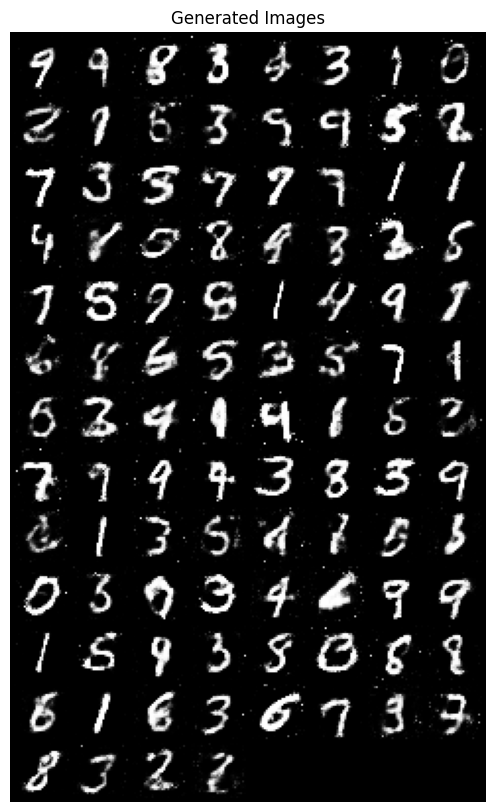

In [ ]:
# Step 9: Visual Inspection of Generated Images
z = torch.randn(batch_size, 100).to(device)
fake_images = generator(z)
fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.title("Generated Images")
plt.imshow(np.transpose(torchvision.utils.make_grid(fake_images, padding=2, normalize=True).cpu(),(1,2,0)))
plt.show()


# 3. Techniques for improving GAN Performance

To enhance the performance and image quality of Generative Adversarial Networks (GANs), various methods can be explored. Here are some suggestions and techniques for refinement:

3.1 **Model Architecture**:
- Deeper Models: Consider using deeper architectures for both the generator and discriminator.
- Convolutional Layers: For image tasks, Convolutional GANs often perform better. Use convolutional layers instead of fully connected ones.

3.2 **Loss Functions**:
- Wasserstein Loss: The Wasserstein GAN utilizes a different loss metric, often improving training stability.
- Gradient Penalty: Alongside Wasserstein GANs, use gradient penalty for further training stabilization.

3.3 **Regularization**:
- Dropout: Including dropout layers in your model can help prevent overfitting.
- Label Smoothing: Using label values slightly less than 1 for real samples can enhance model robustness.

3.4 **Optimization and Learning Rate**:
- Explore other optimizers like RMSprop or SGD.
- Consider learning rate scheduling by gradually reducing the learning rate.

3.5 **Mode Collapse**: To combat lack of diversity in generated images, techniques like mini-batch discrimination can be used.

3.6 **Larger Datasets**: If feasible, train GANs on larger or more diverse datasets.

3.7 **Pretrained Models**: Think about pretraining your model on a larger dataset and then fine-tuning on a specific dataset.

3.8 **Attention Mechanisms**: Introducing attention mechanisms in GANs, such as in Self-Attention GANs, can help the model capture long-range dependencies.

3.9 **GAN Variants**: Look into other GAN structures and techniques like Conditional GAN, CycleGAN, BigGAN, etc.

3.10 **Training Tricks**:

- Alternating Training: It's not always necessary to train the generator and discriminator for the same number of steps. Sometimes, training the discriminator for more steps can be beneficial.
- Early Stopping: If the quality of generated images starts to decline during training, consider halting the training process.

**Evaluation Metrics**: Beyond FID, other metrics like Inception Score (IS), Precision and Recall, etc., can be utilized to gauge the quality of generated images.

# Questions:

## 1. Why CNN is preferred for image problems?

Convolutional Neural Networks (CNNs) are preferred for image-related problems for several key reasons:

- Hierarchical Feature Learning: CNNs are designed to automatically and adaptively learn hierarchical features from images. They consist of multiple layers, including convolutional layers and pooling layers, which enable them to capture low-level features (such as edges and textures) and gradually build up to higher-level features (such as shapes and objects). This hierarchical feature learning is well-suited for image understanding.

- Translation Invariance: CNNs are translation-invariant, which means they can recognize patterns in an image regardless of their position. This property is essential for handling objects or features that may appear in different locations within an image.

- Local Receptive Fields: Convolutional layers in CNNs use local receptive fields to scan small regions of the input image. This local processing allows them to capture spatial dependencies and relationships effectively. Neurons in deeper layers have larger receptive fields, enabling them to recognize more complex patterns.

- Parameter Sharing: CNNs employ parameter sharing, where the same set of weights (filters) is used across different spatial locations. This reduces the number of learnable parameters compared to fully connected networks, making CNNs more computationally efficient and capable of handling large images.

- Spatial Hierarchy: CNN architectures, especially when deep, naturally capture the spatial hierarchy of objects in images. They can learn to recognize simple features like edges and corners first and then combine these features to recognize more complex structures, such as shapes, objects, and object arrangements.

- Effective Regularization: The pooling layers and dropout techniques commonly used in CNNs help prevent overfitting by reducing spatial dimensions and introducing noise during training.

- State-of-the-Art Performance: CNNs have consistently demonstrated state-of-the-art performance in various computer vision tasks, including image classification, object detection, image segmentation, and more. Their success in these applications has solidified their reputation as a go-to choice for image-related problems.

- Availability of Pretrained Models: Pretrained CNN models, such as those trained on massive datasets like ImageNet, provide an excellent starting point for many image-related tasks. Transfer learning allows practitioners to fine-tune these models on smaller, task-specific datasets, saving time and computational resources.

Due to these advantages, CNNs have become the backbone of many computer vision and image processing applications, making them the preferred choice for solving image problems in a wide range of domains.